In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files

uploaded = files.upload()

Saving ipl.csv to ipl (1).csv


In [3]:
# Load the data
df = pd.read_csv('ipl.csv')
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
df.shape

(76014, 15)

**Data Preprocessing**: We'll remove any rows that are not relevant or could distort our analysis. Given that we're analyzing overall team performance, we'll remove rows corresponding to matches that have less than 5 overs of data, as these could skew our analysis.

In [5]:
# Data Preprocessing
df = df[df['overs']>=5.0]

**Feature Engineering:** We'll compute some basic metrics such as total runs scored by each team, total wickets taken by each team, total matches played by each team, and total matches won by each team. We'll also compute derived metrics like the average runs per match and the win ratio for each team.

In [12]:
# Total runs scored by each team
total_runs = df.groupby('bat_team')['runs'].sum()

# Total wickets taken by each team
total_wickets = df.groupby('bowl_team')['wickets'].sum()

# Total matches played by each team
total_matches = df.groupby('bat_team')['mid'].nunique()

# Construct a DataFrame with these metrics
team_performance = pd.DataFrame({
    'Total Runs': total_runs,
    'Total Wickets': total_wickets,
    'Total Matches': total_matches
})

# Compute derived metrics
team_performance['Average Runs per Match'] = team_performance['Total Runs'] / team_performance['Total Matches']
# Display the DataFrame
team_performance


,Total Runs,Total Wickets,Total Matches,Average Runs per Match
Chennai Super Kings,664454,14928,74,8979.108108
Deccan Chargers,365663,9402,43,8503.790698
Delhi Daredevils,492089,23802,58,8484.293103
Gujarat Lions,127908,4262,14,9136.285714
Kings XI Punjab,659457,18104,75,8792.760000
Kochi Tuskers Kerala,59067,1858,7,8438.142857
Kolkata Knight Riders,549459,21130,66,8325.136364
Mumbai Indians,713415,20965,82,8700.182927
Pune Warriors,160594,6207,20,8029.700000
Rajasthan Royals,473620,18849,54,8770.740741


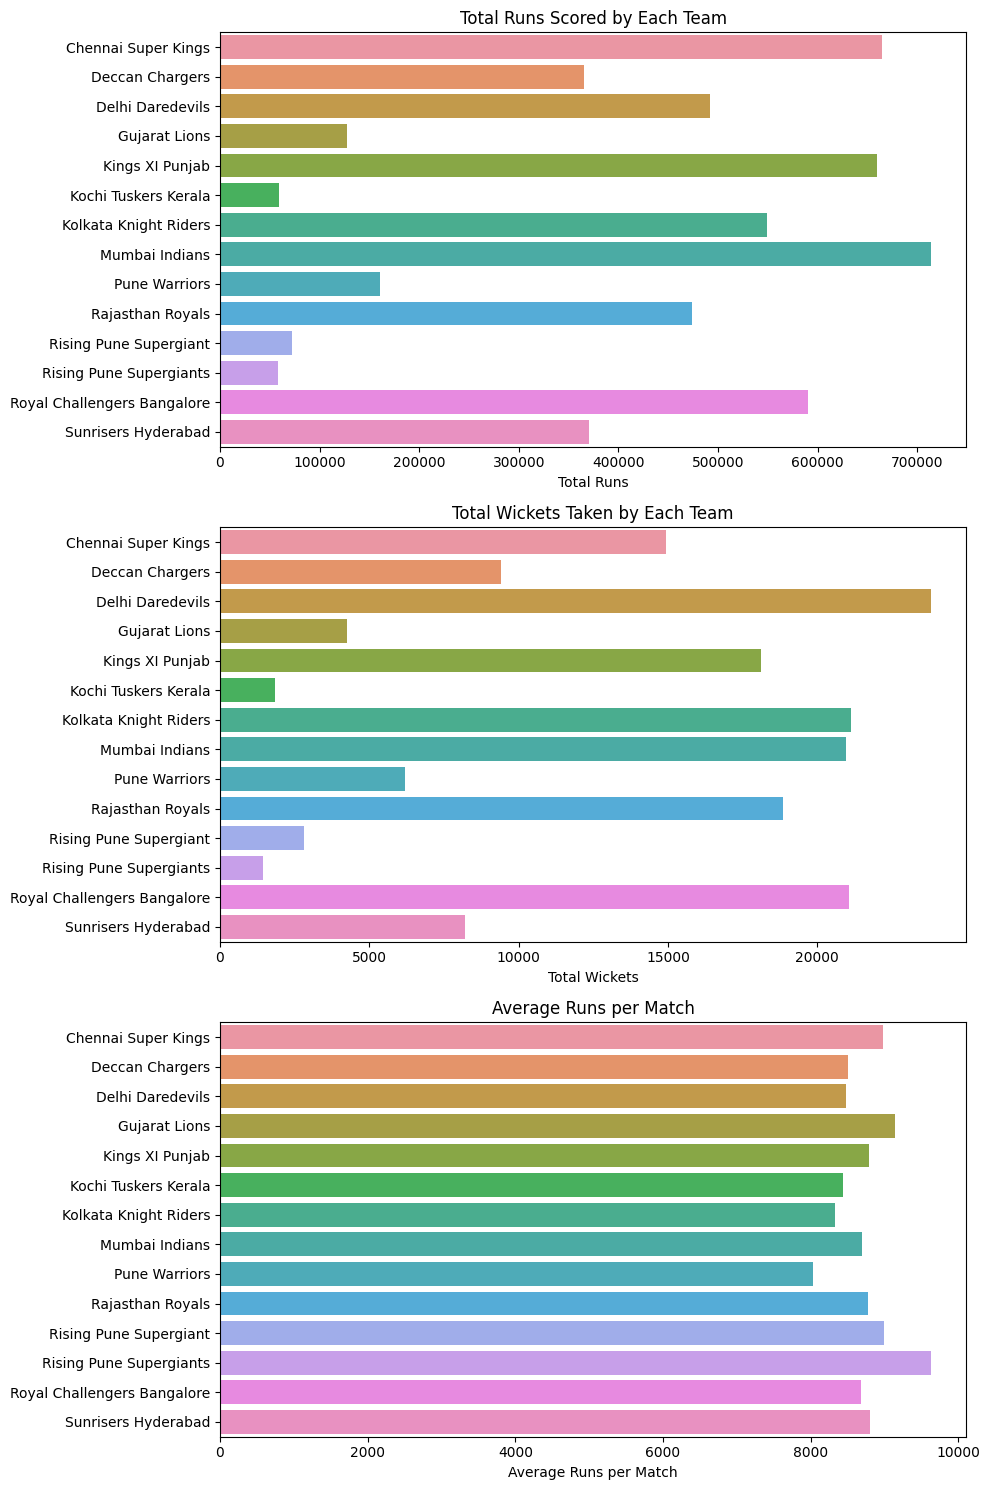

In [14]:
# Set up the matplotlib figure
f, axes = plt.subplots(3, 1, figsize=(10, 15))

# Total Runs Scored by Each Team
sns.barplot(x=team_performance['Total Runs'], y=team_performance.index, ax=axes[0])
axes[0].set_title('Total Runs Scored by Each Team')

# Total Wickets Taken by Each Team
sns.barplot(x=team_performance['Total Wickets'], y=team_performance.index, ax=axes[1])
axes[1].set_title('Total Wickets Taken by Each Team')

# Average Runs per Match
sns.barplot(x=team_performance['Average Runs per Match'], y=team_performance.index, ax=axes[2])
axes[2].set_title('Average Runs per Match')

plt.tight_layout()
plt.show()
